#**Prediksi Harga Minyak Sayur**

Pengolahan data ini diperlukan agar pengguna dapat melihat bagaimana prediksi harga minyak sayur yang dijual di kota sehingga mereka dapat mengatur budget keuangan mereka untuk membeli bahan pangan

#**Data Understanding**

In [ ]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot  as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing
from tabulate import tabulate
%matplotlib inline


drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path  ="/content/drive/MyDrive/Data Science - smt 5 - kelompok/Project/DataSheet/Food Price Indonesia_Kel 5.csv"
df = pd.read_csv(path)

In [ ]:
df.head()

,Date,Province,City,Market,Longitude,Latitude,Category,Comodity,Units,Priceflag,Price Typer,Currency,Price,USD
0,2020-01-15,ACEH,ACEH BARAT,Pasar Lapang,4.173922,96.141854,cereals and tubers,Rice,KG,aggregate,Retail,IDR,10198.33,0.7427
1,2020-01-15,ACEH,ACEH BARAT,Pasar Lapang,4.173922,96.141854,cereals and tubers,Rice (high quality),KG,aggregate,Retail,IDR,10929.17,0.7959
2,2020-01-15,ACEH,ACEH BARAT,Pasar Lapang,4.173922,96.141854,cereals and tubers,Rice (low quality),KG,aggregate,Retail,IDR,9445.00,0.6878
3,2020-01-15,ACEH,ACEH BARAT,Pasar Lapang,4.173922,96.141854,cereals and tubers,Rice (medium quality),KG,aggregate,Retail,IDR,10150.00,0.7391
4,2020-01-15,ACEH,ACEH BARAT,Pasar Lapang,4.173922,96.141854,"meat, fish and eggs",Eggs,KG,aggregate,Retail,IDR,24675.00,1.7969


In [ ]:
df.tail()

,Date,Province,City,Market,Longitude,Latitude,Category,Comodity,Units,Priceflag,Price Typer,Currency,Price,USD
78426,2021-03-15,SUMATERA UTARA,KOTA SIBOLGA,Pasar Nauli Sibolga,1.738378,98.78446,vegetables and fruits,"Chili (red, curly)",KG,aggregate,Retail,IDR,39545.45,2.7429
78427,2021-03-15,SUMATERA UTARA,KOTA SIBOLGA,Pasar Nauli Sibolga,1.738378,98.78446,vegetables and fruits,Garlic,KG,aggregate,Retail,IDR,26886.36,1.8649
78428,2021-03-15,SUMATERA UTARA,KOTA SIBOLGA,Pasar Nauli Sibolga,1.738378,98.78446,vegetables and fruits,Garlic (medium),KG,aggregate,Retail,IDR,26886.36,1.8649
78429,2021-03-15,SUMATERA UTARA,KOTA SIBOLGA,Pasar Nauli Sibolga,1.738378,98.78446,vegetables and fruits,Onions (shallot),KG,aggregate,Retail,IDR,35568.18,2.4670
78430,2021-03-15,SUMATERA UTARA,KOTA SIBOLGA,Pasar Nauli Sibolga,1.738378,98.78446,vegetables and fruits,"Onions (shallot, medium)",KG,aggregate,Retail,IDR,35568.18,2.4670


### Menampilkan Jumlah Baris dan Kolom

In [ ]:
df.shape

(78431, 14)

### Melihat tipe data dan informasi pada masing-masing kolom

In [ ]:
df.dtypes

Date            object
Province        object
City            object
Market          object
Longitude      float64
Latitude       float64
Category        object
Comodity        object
Units           object
Priceflag       object
Price Typer     object
Currency        object
Price          float64
USD            float64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78431 entries, 0 to 78430
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         78431 non-null  object 
 1   Province     78431 non-null  object 
 2   City         78431 non-null  object 
 3   Market       78431 non-null  object 
 4   Longitude    78431 non-null  float64
 5   Latitude     78431 non-null  float64
 6   Category     78431 non-null  object 
 7   Comodity     78431 non-null  object 
 8   Units        78431 non-null  object 
 9   Priceflag    78431 non-null  object 
 10  Price Typer  78431 non-null  object 
 11  Currency     78431 non-null  object 
 12  Price        78431 non-null  float64
 13  USD          78431 non-null  float64
dtypes: float64(4), object(10)
memory usage: 8.4+ MB


In [ ]:
df.dtypes

Date            object
Province        object
City            object
Market          object
Longitude      float64
Latitude       float64
Category        object
Comodity        object
Units           object
Priceflag       object
Price Typer     object
Currency        object
Price          float64
USD            float64
dtype: object

#**Data Preprocessing**

### Data Cleaning

In [ ]:
df.isnull()

,Date,Province,City,Market,Longitude,Latitude,Category,Comodity,Units,Priceflag,Price Typer,Currency,Price,USD
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78426,False,False,False,False,False,False,False,False,False,False,False,False,False,False
78427,False,False,False,False,False,False,False,False,False,False,False,False,False,False
78428,False,False,False,False,False,False,False,False,False,False,False,False,False,False
78429,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

Date           0
Province       0
City           0
Market         0
Longitude      0
Latitude       0
Category       0
Comodity       0
Units          0
Priceflag      0
Price Typer    0
Currency       0
Price          0
USD            0
dtype: int64

### Filtering Minyak Sayur 

In [ ]:
indexCom = df[(df['Comodity'] == 'Rice') |
              (df['Comodity'] == 'Rice (high quality)') | 
              (df['Comodity'] == 'Rice (low quality)') | 
              (df['Comodity'] == 'Rice (medium quality)') |
              (df['Comodity'] == 'Sugar') | 
              (df['Comodity'] == 'Sugar (local)') | 
              (df['Comodity'] == 'Sugar (premium)') |
              (df['Comodity'] == 'Chili (red)') |
              (df['Comodity'] == 'Chili (bird\'s eye)') |
              (df['Comodity'] == 'Chili (red, large)') |
              (df['Comodity'] == 'Chili (bird\'s eye, red)') |
              (df['Comodity'] == 'Chili (bird\'s eye, green)') | 
              (df['Comodity'] == 'Chili (red, curly)') |
              (df['Comodity'] == 'Eggs (broiler)') |
              (df['Comodity'] == 'Eggs') |
              (df['Comodity'] == 'Garlic') |
              (df['Comodity'] == 'Garlic (medium)') |
              (df['Comodity'] == 'Meat (beef)') |
              (df['Comodity'] == 'Meat (beef, first quality)') |
              (df['Comodity'] == 'Meat (chicken)') |
              (df['Comodity'] == 'Meat (chicken, broiler)') |
              (df['Comodity'] == 'Oil (vegetable, bulk)') |
              (df['Comodity'] == 'Oil (vegetable, packaged)') |
              (df['Comodity'] == 'Onions (shallot)') |
              (df['Comodity'] == 'Onions (shallot, medium)') |
              (df['Comodity'] == 'Meat (beef, second quality)') 
              ].index
df.drop(indexCom , inplace=True)

In [ ]:
df.head()

,Date,Province,City,Market,Longitude,Latitude,Category,Comodity,Units,Priceflag,Price Typer,Currency,Price,USD
11,2020-01-15,ACEH,ACEH BARAT,Pasar Lapang,4.173922,96.141854,oil and fats,Oil (vegetable),KG,aggregate,Retail,IDR,13156.67,0.9581
35,2020-01-15,ACEH,ACEH BARAT,Pasar Ujong Baro,4.145448,96.129642,oil and fats,Oil (vegetable),KG,aggregate,Retail,IDR,13743.33,1.0008
59,2020-01-15,ACEH,KOTA BANDA ACEH,Pasar Peunayong,5.560894,95.318847,oil and fats,Oil (vegetable),KG,aggregate,Retail,IDR,13650.00,0.9940
83,2020-01-15,ACEH,KOTA BANDA ACEH,Pasar Ulee Kareng,5.550923,95.356921,oil and fats,Oil (vegetable),KG,aggregate,Retail,IDR,14416.67,1.0498
108,2020-01-15,ACEH,KOTA LHOKSEUMAWE,Pasar Inpres,5.183482,97.141528,oil and fats,Oil (vegetable),KG,aggregate,Retail,IDR,14263.33,1.0387


Mengubah tipe data date

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

###Visualisasi dan Agregasi

In [ ]:
x = df["Date"].unique()

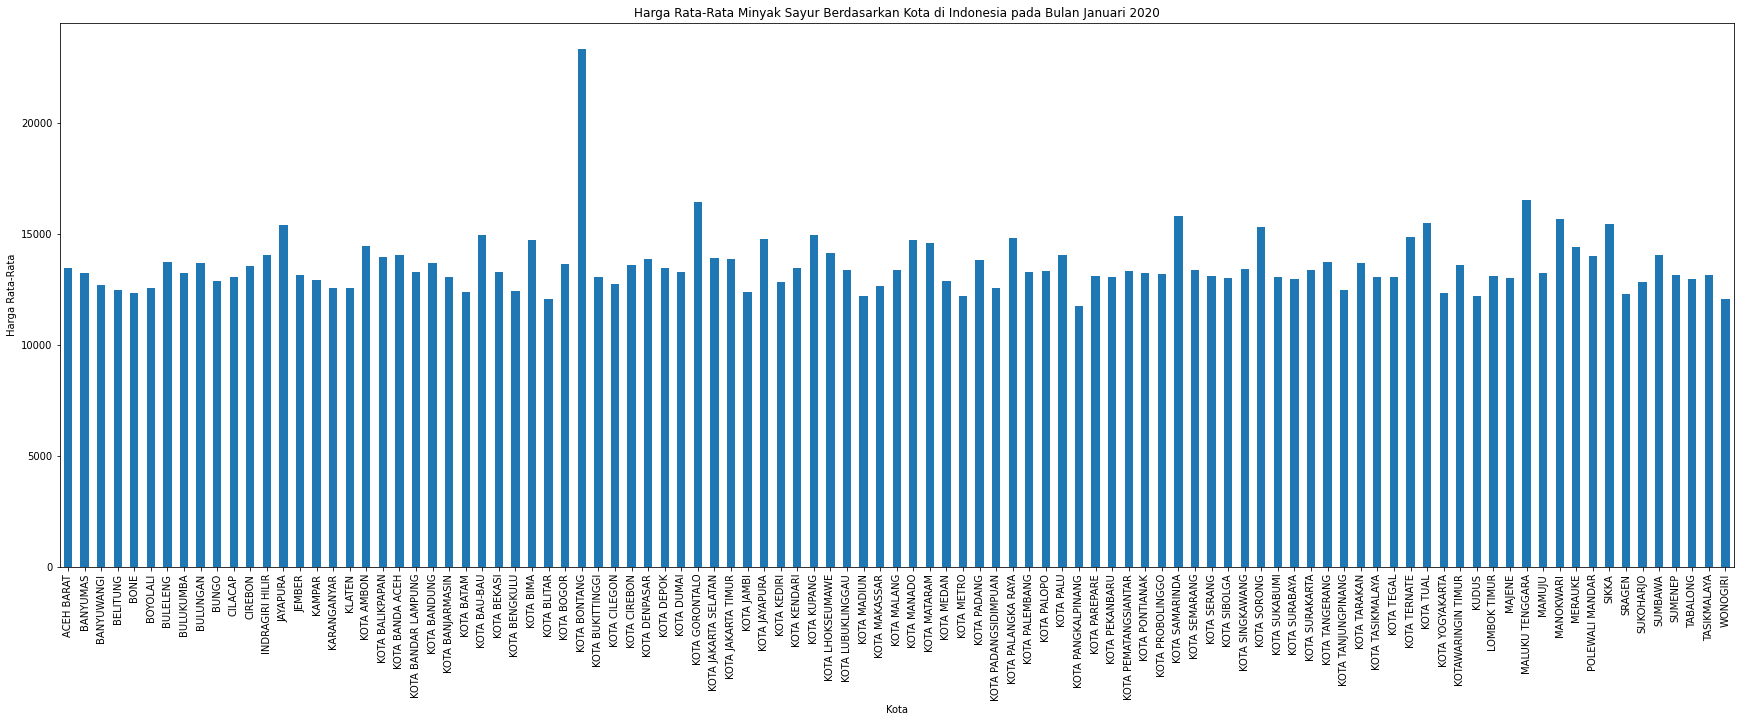

In [ ]:
beras = df.loc[df['Date'] == "2020-01-15"]
beras.groupby(['City'])['Price'].mean().plot(kind = "bar", figsize=(30, 10), title='Harga Rata-Rata Minyak Sayur Berdasarkan Kota di Indonesia pada Bulan Januari 2020', xlabel='Kota', ylabel='Harga Rata-Rata')

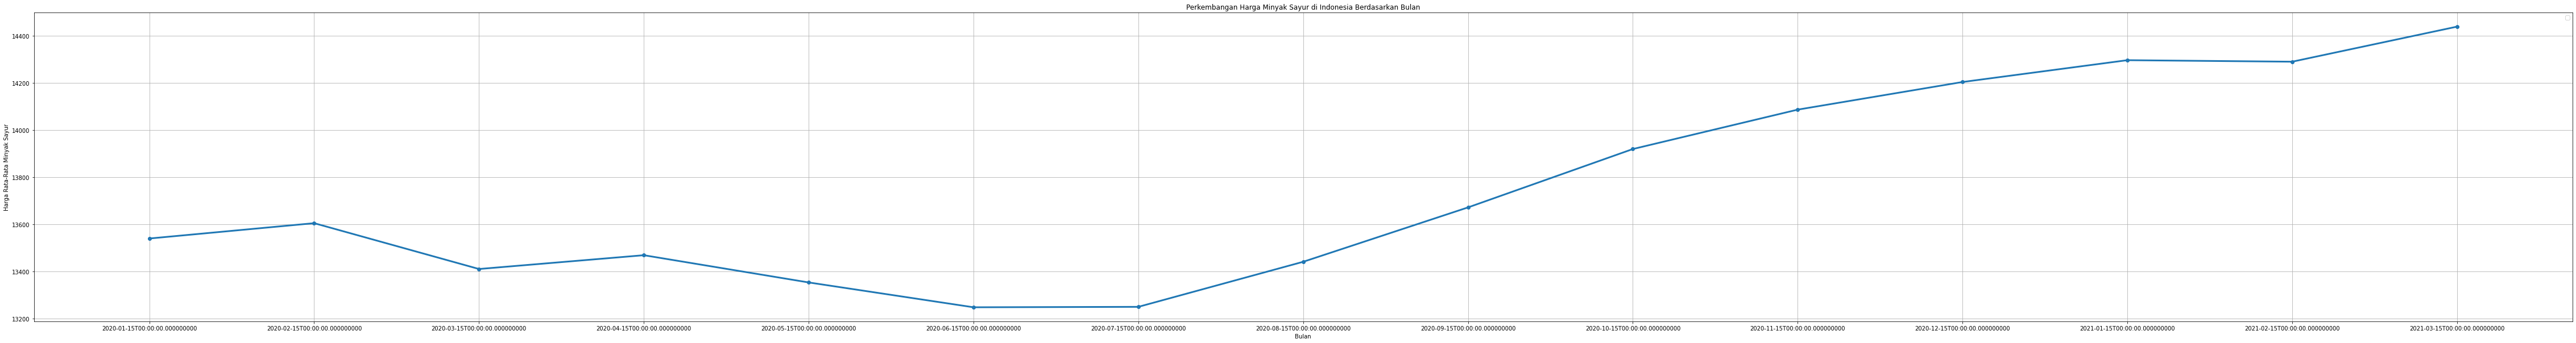

In [ ]:
x_axis = np.arange(len(x))


fig = plt.figure(figsize = (80, 10))

plt.plot(x_axis, df.groupby(['Date'])["Price"].mean(), marker='o', linewidth=3)

plt.xticks(x_axis, x)
plt.xlabel("Bulan")
plt.ylabel("Harga Rata-Rata Minyak Sayur")
plt.title("Perkembangan Harga Minyak Sayur di Indonesia Berdasarkan Bulan")

plt.grid()
plt.legend()
plt.show()

### Feature Engineering

Cek kolom yang isinya hanya satu jenis

In [ ]:
df['Units'].unique()
df['Priceflag'].unique()
df['Price Typer'].unique()
df['Currency'].unique()

array(['IDR'], dtype=object)

Menghapus kolom yang tidak digunakan

In [ ]:
df = df.drop(columns=['Category', 'Comodity', 'Priceflag', 'Price Typer', 'Longitude', 'Latitude', 'Currency', 'Units', 'Category', 'USD'])

Karena kita akan membuat prediksi berdasarkan kota maka, kita akan melakukan agregasi sesuai dengan goals kita

In [ ]:
df = df.groupby(["Date","Province","City"], as_index=False).mean()

In [ ]:
df.head()

,Date,Province,City,Price
0,2020-01-15,ACEH,ACEH BARAT,13450.000
1,2020-01-15,ACEH,KOTA BANDA ACEH,14033.335
2,2020-01-15,ACEH,KOTA LHOKSEUMAWE,14133.330
3,2020-01-15,BALI,BULELENG,13712.500
4,2020-01-15,BALI,KOTA DENPASAR,13851.850


### Encoding Object to Numerical Data Type

In [ ]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

In [ ]:
df = df.drop(columns=['Date'])

In [ ]:
df.head()

,Province,City,Price,Year,Month
0,ACEH,ACEH BARAT,13450.000,2020,1
1,ACEH,KOTA BANDA ACEH,14033.335,2020,1
2,ACEH,KOTA LHOKSEUMAWE,14133.330,2020,1
3,BALI,BULELENG,13712.500,2020,1
4,BALI,KOTA DENPASAR,13851.850,2020,1


In [ ]:
df = df[['Month', 'Year', 'Province', 'City',	'Price']]

In [ ]:
df.head()

,Month,Year,Province,City,Price
0,1,2020,ACEH,ACEH BARAT,13450.000
1,1,2020,ACEH,KOTA BANDA ACEH,14033.335
2,1,2020,ACEH,KOTA LHOKSEUMAWE,14133.330
3,1,2020,BALI,BULELENG,13712.500
4,1,2020,BALI,KOTA DENPASAR,13851.850


In [ ]:
df1 = pd.get_dummies(df[['City']]) 
df1

,City_ACEH BARAT,City_BANYUMAS,City_BANYUWANGI,City_BELITUNG,City_BONE,City_BOYOLALI,City_BULELENG,City_BULUKUMBA,City_BULUNGAN,City_BUNGO,...,City_SIKKA,City_SINTANG,City_SRAGEN,City_SUKOHARJO,City_SUMBA TIMUR,City_SUMBAWA,City_SUMENEP,City_TABALONG,City_TASIKMALAYA,City_WONOGIRI
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1525,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1526,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1527,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1528,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df2 = pd.concat([df1, df[['Month', 'Year', 'Price']]], axis=1)
df2

,City_ACEH BARAT,City_BANYUMAS,City_BANYUWANGI,City_BELITUNG,City_BONE,City_BOYOLALI,City_BULELENG,City_BULUKUMBA,City_BULUNGAN,City_BUNGO,...,City_SUKOHARJO,City_SUMBA TIMUR,City_SUMBAWA,City_SUMENEP,City_TABALONG,City_TASIKMALAYA,City_WONOGIRI,Month,Year,Price
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,2020,13450.000
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,2020,14033.335
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,2020,14133.330
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,2020,13712.500
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,2020,13851.850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1525,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,2021,15760.225
1526,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,2021,13774.998
1527,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,2021,14425.000
1528,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,2021,14669.315


In [ ]:
df2.shape

(1530, 109)

#**Modelling**

In [ ]:
x = df2.drop('Price',axis=True)
y = df2['Price']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 42)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
ms.fit_transform(x_train)
ms.transform(x_test)

array([[0.        , 0.        , 0.        , ..., 0.        , 0.54545455,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.27272727,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.72727273,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.90909091,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.18181818,
        0.        ]])

In [ ]:
x_train.shape, x_test.shape

((1224, 108), (306, 108))

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn import metrics
import statsmodels.api as sm

##Linear Regresi

Intercept : -257302612721321.28
Coefficient : [2.57302611e+14 2.57302611e+14 2.57302611e+14 2.57302611e+14
 2.57302611e+14 2.57302611e+14 2.57302611e+14 2.57302611e+14
 2.57302611e+14 2.57302611e+14 2.57302611e+14 2.57302611e+14
 2.57302611e+14 2.57302611e+14 2.57302611e+14 2.57302611e+14
 2.57302611e+14 2.57302611e+14 2.57302611e+14 2.57302611e+14
 2.57302611e+14 2.57302611e+14 2.57302611e+14 2.57302611e+14
 2.57302611e+14 2.57302611e+14 2.57302611e+14 2.57302611e+14
 2.57302611e+14 2.57302611e+14 2.57302611e+14 2.57302611e+14
 2.57302611e+14 2.57302611e+14 2.57302611e+14 2.57302611e+14
 2.57302611e+14 2.57302611e+14 2.57302611e+14 2.57302611e+14
 2.57302611e+14 2.57302611e+14 2.57302611e+14 2.57302611e+14
 2.57302611e+14 2.57302611e+14 2.57302611e+14 2.57302611e+14
 2.57302611e+14 2.57302611e+14 2.57302611e+14 2.57302611e+14
 2.57302611e+14 2.57302611e+14 2.57302611e+14 2.57302611e+14
 2.57302611e+14 2.57302611e+14 2.57302611e+14 2.57302611e+14
 2.57302611e+14 2.57302611e+14 2.573026

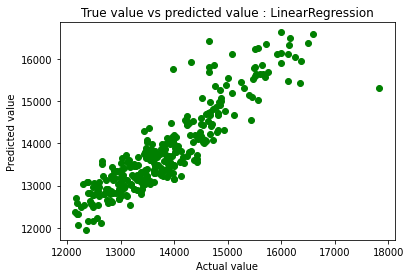

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)
y_pred = lin_reg.predict(x_test)

a = lin_reg.intercept_
b = lin_reg.coef_

print(f"Intercept : {a}")
print(f"Coefficient : {b}")

print("Train Set Accuracy:"+str(r2_score(y_train,lin_reg.predict(x_train))))
print("Test Set Accuracy:"+str(r2_score(y_test,lin_reg.predict(x_test))))

#Calculating R2
r2lr = r2_score(y_test, y_pred)
print("R2:",r2lr)
#Calculating MSE, lower the value better it is. 0 means perfect prediction
mselr = metrics.mean_squared_error(y_test, y_pred)
print('Mean squared error of testing set:', mselr)
#Calculating MAE
maelr = metrics.mean_absolute_error(y_test, y_pred)
print('Mean absolute error of testing set:', maelr)
#Calculating RMSE
rmselr = np.sqrt(mselr)
print('Root Mean Squared Error of testing set:', rmselr)
#Calculating MAPE
mapelr = metrics.mean_absolute_percentage_error(y_pred, y_test)
print('Mean Absolut Error Percentage of testing set:', mapelr)

#Plotting y_test dan y_pred
plt.scatter(y_test, y_pred, c = 'green')
plt.xlabel('Actual value')
plt.ylabel('Predicted value')
plt.title('True value vs predicted value : LinearRegression')
plt.show() 

In [ ]:
hasil_b = {'predict':y_pred, 'real':y_test}
df_b = pd.DataFrame(hasil_b)
df_b.sort_index(inplace=True)
df_b

,predict,real
15,13108.62500,13548.335
23,13126.18750,13123.335
29,13076.87500,13381.250
30,12883.56250,13375.000
32,12068.56250,12202.560
...,...,...
1516,14444.84375,14542.045
1518,15815.18750,15517.045
1519,14357.03125,13534.090
1521,13802.00000,14012.825


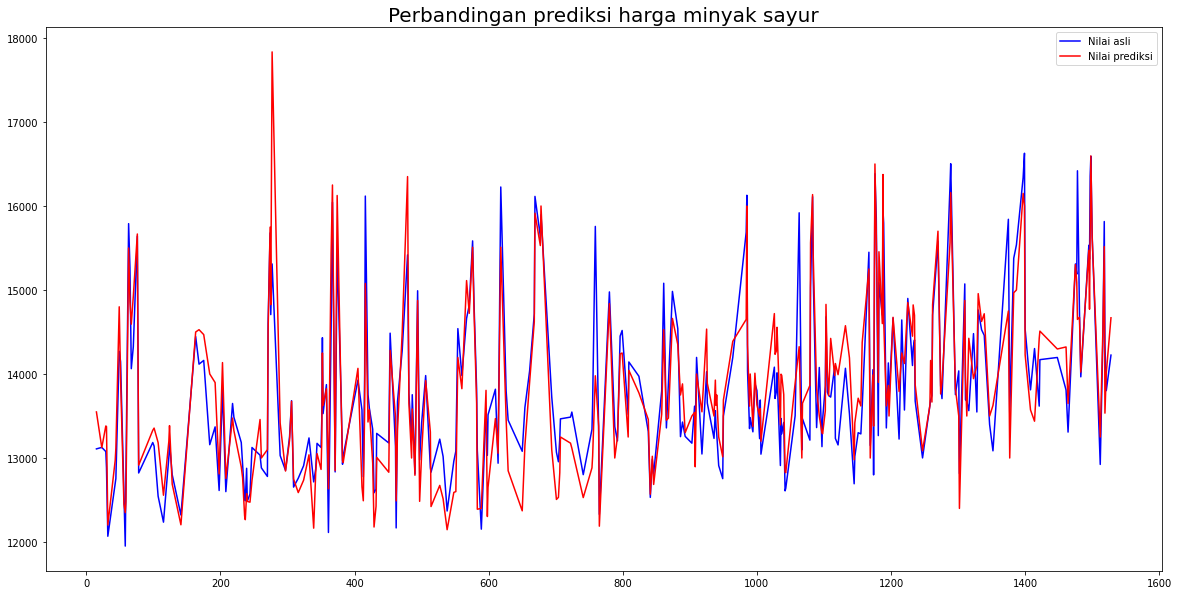

In [ ]:
plt.figure(figsize=(20,10))
plt.title("Perbandingan prediksi harga minyak sayur" , fontsize=20)


plt.plot(df_b["predict"] , color='b')
plt.plot(df_b["real"] , color='r')


plt.legend(["Nilai asli" , "Nilai prediksi"])
plt.show()

In [ ]:
lin_reg.predict([ [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2023] ])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([15885.28125])

## Random Forest

Train Set Accuracy:98.01673616622664
Test Set Accuracy:88.8660963911313
R2: 0.888660963911313
Mean squared error of testing set: 113774.14450897649
Mean absolute error of testing set: 228.57893735294027
Root Mean Squared Error of testing set: 337.30423138314836
Mean Absolut Error Percentage of testing set: 0.01647136657059458


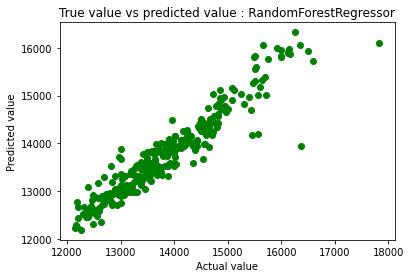

In [ ]:
r_reg = RandomForestRegressor()
r_reg.fit(x_train,y_train)
y_pred = r_reg.predict(x_test)

r_acc=r2_score(y_test,r_reg.predict(x_test))

print("Train Set Accuracy:"+str(r2_score(y_train,r_reg.predict(x_train))*100))
print("Test Set Accuracy:"+str(r2_score(y_test,r_reg.predict(x_test))*100))

#Calculating R2
r2rf = r2_score(y_test, y_pred)
print("R2:",r2rf)
#Calculating MSE, lower the value better it is. 0 means perfect prediction
mserf = metrics.mean_squared_error(y_test, y_pred)
print('Mean squared error of testing set:', mserf)
#Calculating MAE
maerf = metrics.mean_absolute_error(y_test, y_pred)
print('Mean absolute error of testing set:', maerf)
#Calculating RMSE
rmserf = np.sqrt(mserf)
print('Root Mean Squared Error of testing set:', rmserf)
maperf = metrics.mean_absolute_percentage_error(y_pred, y_test)
print('Mean Absolut Error Percentage of testing set:', maperf)

#Plotting y_test dan y_pred
plt.scatter(y_test, y_pred, c = 'green')
plt.xlabel('Actual value')
plt.ylabel('Predicted value')
plt.title('True value vs predicted value : RandomForestRegressor')
plt.show()

In [ ]:
hasil_d = {'predict':y_pred, 'real':y_test}
df_d = pd.DataFrame(hasil_d)
df_d.sort_index(inplace=True)

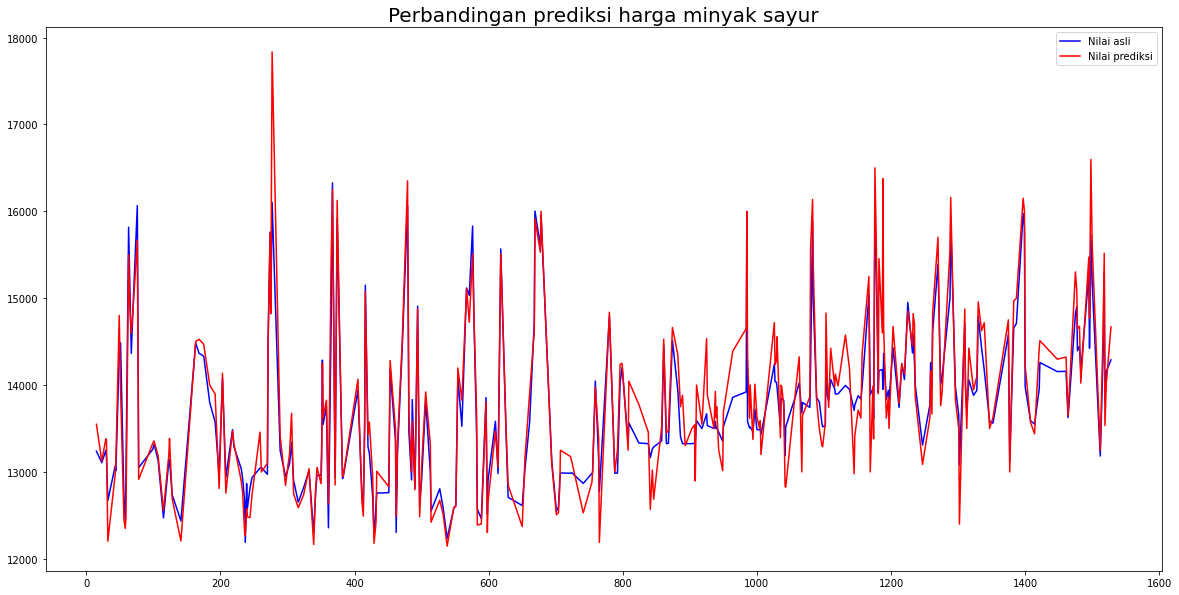

In [ ]:
plt.figure(figsize=(20,10))
plt.title("Perbandingan prediksi harga minyak sayur" , fontsize=20)


plt.plot(df_d["predict"] , color='b')
plt.plot(df_d["real"] , color='r')


plt.legend(["Nilai asli" , "Nilai prediksi"])
plt.show()

## DT

Train Set Accuracy:100.0
Test Set Accuracy:86.2961849242944
R2: 0.862961849242944
Mean squared error of testing set: 140035.3273676349
Mean absolute error of testing set: 230.81016666666656
Root Mean Squared Error of testing set: 374.21294388039934
Mean Absolut Error Percentage of testing set: 0.016912628731168933


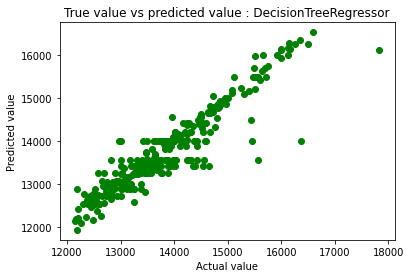

In [ ]:
d_reg = DecisionTreeRegressor()
d_reg.fit(x_train,y_train)
y_pred = d_reg.predict(x_test)

d_acc=r2_score(y_test,d_reg.predict(x_test))

print("Train Set Accuracy:"+str(r2_score(y_train,d_reg.predict(x_train))*100))
print("Test Set Accuracy:"+str(r2_score(y_test,d_reg.predict(x_test))*100))

#Calculating R2
r2dt = r2_score(y_test, y_pred)
print("R2:",r2dt)
#Calculating MSE, lower the value better it is. 0 means perfect prediction
msedt = metrics.mean_squared_error(y_test, y_pred)
print('Mean squared error of testing set:', msedt)
#Calculating MAE
maedt = metrics.mean_absolute_error(y_test, y_pred)
print('Mean absolute error of testing set:', maedt)
#Calculating RMSE
rmsedt = np.sqrt(msedt)
print('Root Mean Squared Error of testing set:', rmsedt)
mapedt = metrics.mean_absolute_percentage_error(y_pred, y_test)
print('Mean Absolut Error Percentage of testing set:', mapedt)
#Plotting y_test dan y_pred
plt.scatter(y_test, y_pred, c = 'green')
plt.xlabel('Actual value')
plt.ylabel('Predicted value')
plt.title('True value vs predicted value : DecisionTreeRegressor')
plt.show()

In [ ]:
hasil_c = {'predict':y_pred, 'real':y_test}
df_c = pd.DataFrame(hasil_c)
df_c.sort_index(inplace=True)

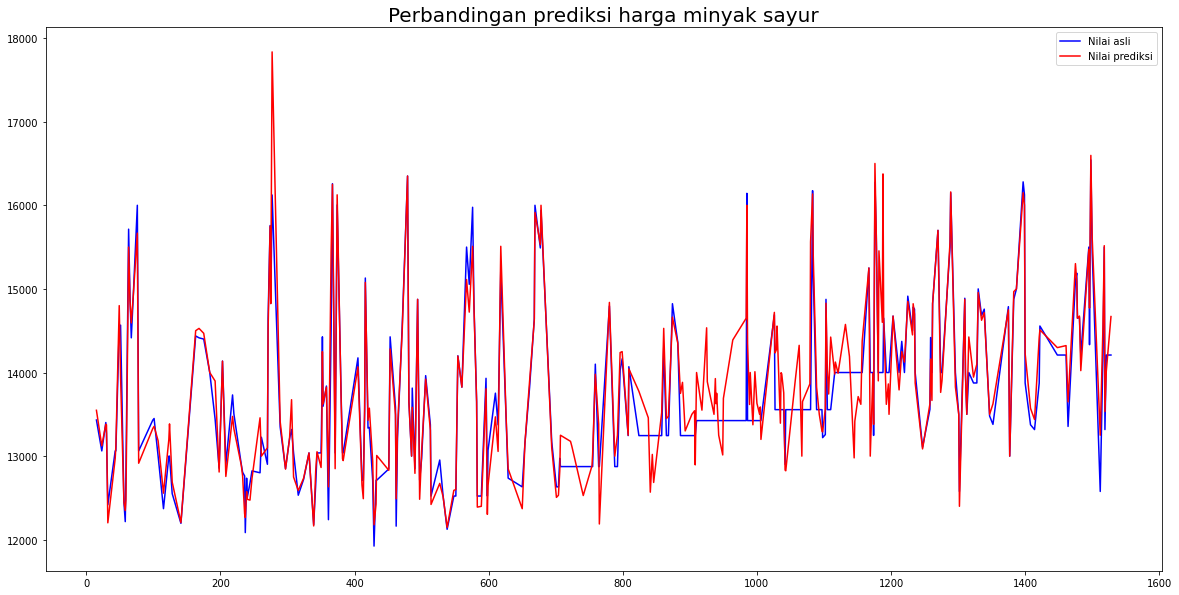

In [ ]:
plt.figure(figsize=(20,10))
plt.title("Perbandingan prediksi harga minyak sayur" , fontsize=20)


plt.plot(df_c["predict"] , color='b')
plt.plot(df_c["real"] , color='r')


plt.legend(["Nilai asli" , "Nilai prediksi"])
plt.show()

#**Hasil Evaluasi**

In [ ]:
data = [['Decision Tree', msedt, maedt, rmsedt, mapedt, r2dt],["Linear Regression",  mselr, maelr, rmselr, mapelr, r2lr],["Random Forest",  mserf, maerf, rmserf, maperf, r2rf]]
perbandingan = pd.DataFrame(data, columns=['algorithms', 'Mean Squared Error','Mean Absolute Error', 'Root Mean Squared Error', 'Mean Absolut Percentage Error','R2'])

In [ ]:
perbandingan

,algorithms,Mean Squared Error,Mean Absolute Error,Root Mean Squared Error,Mean Absolut Percentage Error,R2
0,Decision Tree,140035.327368,230.810167,374.212944,0.016913,0.862962
1,Linear Regression,200623.393598,336.906185,447.910028,0.024202,0.803671
2,Random Forest,113774.144509,228.578937,337.304231,0.016471,0.888661
